In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
class EpsilonGreedyBandit:
    def __init__(self, k, epsilon, decay=0.99):
        self.k = k
        self.epsilon = epsilon
        self.decay = decay
        self.counts = np.zeros(k)
        self.values = np.zeros(k)

    def select_arm(self):
        if random.random() < self.epsilon:
            return random.randint(0, self.k - 1)
        else:
            return np.argmax(self.values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        self.values[arm] += (reward - self.values[arm]) / self.counts[arm]
        self.epsilon *= self.decay

    def simulate(self, num_rounds, true_rewards):
        rewards = []
        optimal_actions = 0
        arm_selection_counts = np.zeros(self.k)
        
        for i in range(num_rounds):
            arm = self.select_arm()
            reward = 1 if random.random() < true_rewards[arm] else 0
            self.update(arm, reward)
            rewards.append(reward)
            arm_selection_counts[arm] += 1
            if arm == np.argmax(true_rewards):
                optimal_actions += 1
        
        return rewards, optimal_actions / num_rounds, arm_selection_counts

In [4]:
# Parameters
k = 5
epsilon = 0.1
num_rounds = 1000
true_rewards = [0.1, 0.3, 0.5, 0.7, 0.9]

In [5]:
# Run Bandit Simulation
bandit = EpsilonGreedyBandit(k, epsilon)
rewards, optimal_action_rate, arm_selection_counts = bandit.simulate(num_rounds, true_rewards)

In [6]:
# Output Results
print("Total Rewards:", sum(rewards))
print("Optimal Action Rate:", optimal_action_rate)
print("Estimated Rewards:", bandit.values)
print("Arm Selection Counts:", arm_selection_counts)

Total Rewards: 880
Optimal Action Rate: 0.961
Estimated Rewards: [0.2        0.         0.6        0.63157895 0.89490114]
Arm Selection Counts: [ 10.   0.  10.  19. 961.]


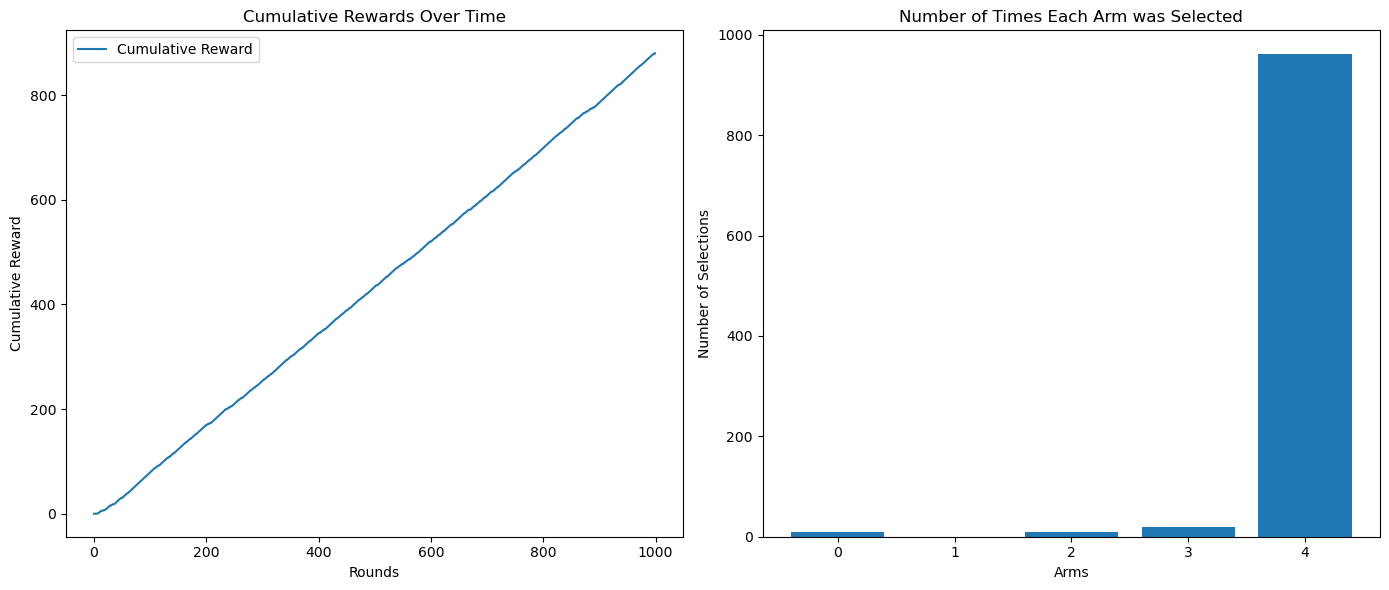

In [8]:
# Plotting Results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(rewards), label="Cumulative Reward")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Rewards Over Time")
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(range(k), arm_selection_counts)
plt.xlabel("Arms")
plt.ylabel("Number of Selections")
plt.title("Number of Times Each Arm was Selected")

plt.tight_layout()
plt.show()